Mise en place de l'environnement d'étude:

In [2]:
from explauto import Environment
environment = Environment.from_configuration('simple_arm', 'default')

Importation des modèles sensorimoteurs: 

In [1]:
from explauto.sensorimotor_model import sensorimotor_models
sensorimotor_models.keys()

dict_keys(['WNN', 'nearest_neighbor', 'LWLR-CMAES', 'LWLR-BFGS'])

Etude du modèle nearest-neighbor:

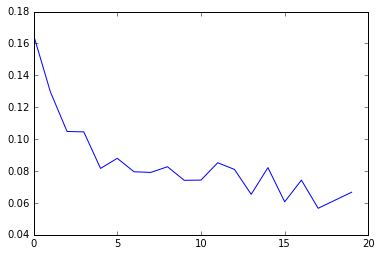

Erreur moyenne MGD


In [84]:
from explauto.sensorimotor_model import available_configurations
from explauto import SensorimotorModel
import numpy as maths
import matplotlib.pyplot as plt

available_configurations('nearest_neighbor')
sm_model = SensorimotorModel.from_configuration(environment.conf, 'nearest_neighbor', 'exact')

n = 1000 #nombre de tests
N = 50 #tous les N tests, on regarde l'erreur de la prédiction
cpt = 0
cpt3 = -1
error_mean_MGD = maths.ones(n/N)
error_mean_MGI = maths.ones(n/N)
error_std_MGD = maths.ones(n/N)
error_std_MGI = maths.ones(n/N)
for m in environment.random_motors(n):
    cpt = cpt + 1
    s = environment.compute_sensori_effect(m)
    sm_model.update(m, s)
    if cpt % N == 0:
        cpt3 = cpt3 + 1
        #print("Après ", cpt, "tests:")
        #test du MGD : 
        error = maths.ones(100)
        cpt2 = 0
        for m_test in environment.random_motors(n=100): 
            s_pred = sm_model.forward_prediction(m_test)
            s_real = environment.compute_sensori_effect(m_test)
            error[cpt2] = maths.linalg.norm(s_pred - s_real)
            cpt2 = cpt2 +1
        error_mean_MGD[cpt3] = maths.median(error)
        error_std_MGD[cpt3] =  maths.std(error)
        #print("MGD : Erreur moyenne : ", maths.median(error), " et deviation standard : ", maths.std(error))
        
        #test du MGI : 
        error = maths.ones(100)
        cpt2 = 0
        for p_test in maths.random.rand(100,2): 
            m_pred = sm_model.inverse_prediction(p_test)
            s_real = environment.compute_sensori_effect(m_pred)
            error[cpt2] = maths.linalg.norm(p_test - s_real)
            cpt2 = cpt2 +1
        error_mean_MGI[cpt3] = maths.median(error)
        error_std_MGI[cpt3] =  maths.std(error)
        
        #print("MGI : Erreur moyenne : ", maths.median(error), " et deviation standard : ", maths.std(error))
        
plt.plot(error_mean_MGD, 'b')
plt.show()
print("Erreur moyenne MGD")

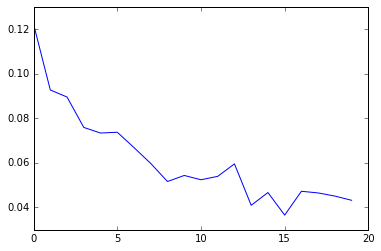

Erreur standard MGD


In [85]:
plt.plot(error_std_MGD, 'b')
plt.show()
print("Erreur standard MGD")

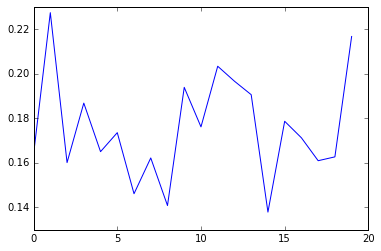

Erreur moyenne MGI


In [88]:
plt.plot(error_mean_MGI, 'b')
plt.show()
print("Erreur moyenne MGI")

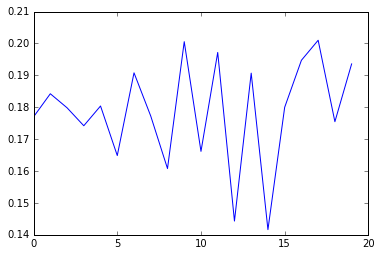

Erreur standard MGI


In [89]:
plt.plot(error_std_MGI, 'b')
plt.show()
print("Erreur standard MGI")

Pour le MGD, on remarque nettement que l'erreur moyenne diminue assez rapidement pour descendre sous la barre des 0,10 m après 200 essais tout comme la déviation standard passée sous la barre des 0.08 m. Cependant, après cela l'erreur et la déviation semble converger doucement, respectivement, vers les 0.8m et 0.6m.

Pour le MGI, il est plus difficile de faire tomber l'erreur et la déviation standard. ceux ci varient beaucoup entre 0,14 et 0,22 m encore après 1000 tests.

La méthode nearest-neighbor a donc une efficacité certaine pour le MGD mais très limité pour le MGI.

Etude du modèle lwlr‐CMAES:

c:\users\olivier\documents\github\apprentissage_hartmann_remont\explauto\build\lib\explauto\sensorimotor_model\inverse\cma.py:2938: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if x0 == str(x0):


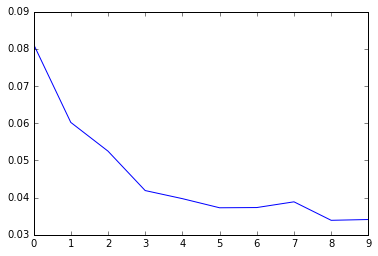

Erreur moyenne MGD


In [93]:
from explauto.sensorimotor_model import available_configurations
from explauto import SensorimotorModel
import numpy as maths
import matplotlib.pyplot as plt

available_configurations('LWLR-CMAES')
sm_model = SensorimotorModel.from_configuration(environment.conf, 'LWLR-CMAES', 'default')

n = 300 #nombre de tests
N = 30 #tous les N tests, on regarde l'erreur de la prédiction
cpt = 0
cpt3 = -1
error_mean_MGD = maths.ones(n/N)
error_mean_MGI = maths.ones(n/N)
error_std_MGD = maths.ones(n/N)
error_std_MGI = maths.ones(n/N)
for m in environment.random_motors(n):
    cpt = cpt + 1
    s = environment.compute_sensori_effect(m)
    sm_model.update(m, s)
    if cpt % N == 0:
        cpt3 = cpt3 + 1
        #print("Après ", cpt, "tests:")
        #test du MGD : 
        error = maths.ones(100)
        cpt2 = 0
        for m_test in environment.random_motors(n=100): 
            s_pred = sm_model.forward_prediction(m_test)
            s_real = environment.compute_sensori_effect(m_test)
            error[cpt2] = maths.linalg.norm(s_pred - s_real)
            cpt2 = cpt2 +1
        error_mean_MGD[cpt3] = maths.median(error)
        error_std_MGD[cpt3] =  maths.std(error)
        #print("MGD : Erreur moyenne : ", maths.median(error), " et deviation standard : ", maths.std(error))
        
        #test du MGI : 
        error = maths.ones(100)
        cpt2 = 0
        for p_test in maths.random.rand(100,2): 
            m_pred = sm_model.inverse_prediction(p_test)
            s_real = environment.compute_sensori_effect(m_pred)
            error[cpt2] = maths.linalg.norm(p_test - s_real)
            cpt2 = cpt2 +1
        error_mean_MGI[cpt3] = maths.median(error)
        error_std_MGI[cpt3] =  maths.std(error)
        
        #print("MGI : Erreur moyenne : ", maths.median(error), " et deviation standard : ", maths.std(error))
        
plt.plot(error_mean_MGD, 'b')
plt.show()
print("Erreur moyenne MGD")

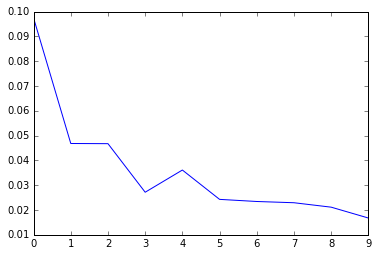

Erreur standard MGD


In [94]:
plt.plot(error_std_MGD, 'b')
plt.show()
print("Erreur standard MGD")

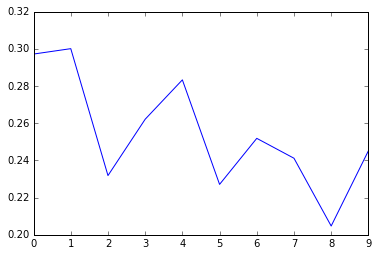

Erreur moyenne MGI


In [95]:
plt.plot(error_mean_MGI, 'b')
plt.show()
print("Erreur moyenne MGI")

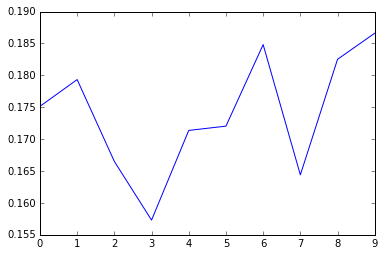

Erreur standard MGI


In [96]:
plt.plot(error_std_MGI, 'b')
plt.show()
print("Erreur standard MGI")

Avec la méthode LWLR-CMAES, le MGD est très rapidement solutionné avec une erreur tombant en dessous des 0,04 m dès les 90èmes tests. L'erreur standard suit la même courbe mais 1cm en dessous. L'erreur moyenne stagne ensuite quand la standard continue à diminuer. Elle est donc tout de même plus performante que la précédente.

Pour le MGI, l'histoire se répère par rapport à la méthode précédente. Cependant, elle reste globalement un peu moins performante.

Etude du modèle WNN:

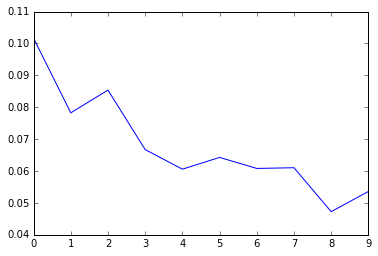

Erreur moyenne MGD


In [101]:
from explauto.sensorimotor_model import available_configurations
from explauto import SensorimotorModel
import numpy as maths
import matplotlib.pyplot as plt

available_configurations('WNN')
sm_model = SensorimotorModel.from_configuration(environment.conf, 'WNN', 'default')

n = 500 #nombre de tests
N = 50 #tous les N tests, on regarde l'erreur de la prédiction
cpt = 0
cpt3 = -1
error_mean_MGD = maths.ones(n/N)
error_mean_MGI = maths.ones(n/N)
error_std_MGD = maths.ones(n/N)
error_std_MGI = maths.ones(n/N)
for m in environment.random_motors(n):
    cpt = cpt + 1
    s = environment.compute_sensori_effect(m)
    sm_model.update(m, s)
    if cpt % N == 0:
        cpt3 = cpt3 + 1
        #print("Après ", cpt, "tests:")
        #test du MGD : 
        error = maths.ones(100)
        cpt2 = 0
        for m_test in environment.random_motors(n=100): 
            s_pred = sm_model.forward_prediction(m_test)
            s_real = environment.compute_sensori_effect(m_test)
            error[cpt2] = maths.linalg.norm(s_pred - s_real)
            cpt2 = cpt2 +1
        error_mean_MGD[cpt3] = maths.median(error)
        error_std_MGD[cpt3] =  maths.std(error)
        #print("MGD : Erreur moyenne : ", maths.median(error), " et deviation standard : ", maths.std(error))
        
        #test du MGI : 
        error = maths.ones(100)
        cpt2 = 0
        for p_test in maths.random.rand(100,2): 
            m_pred = sm_model.inverse_prediction(p_test)
            s_real = environment.compute_sensori_effect(m_pred)
            error[cpt2] = maths.linalg.norm(p_test - s_real)
            cpt2 = cpt2 +1
        error_mean_MGI[cpt3] = maths.median(error)
        error_std_MGI[cpt3] =  maths.std(error)
        
        #print("MGI : Erreur moyenne : ", maths.median(error), " et deviation standard : ", maths.std(error))
        
plt.plot(error_mean_MGD, 'b')
plt.show()
print("Erreur moyenne MGD")

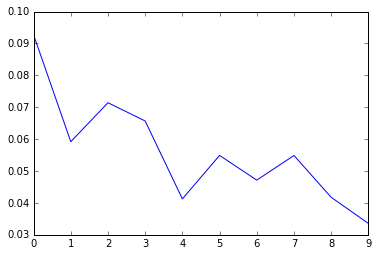

Erreur standard MGD


In [102]:
plt.plot(error_std_MGD, 'b')
plt.show()
print("Erreur standard MGD")

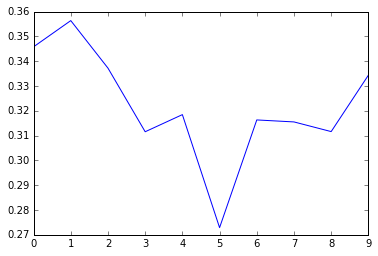

Erreur moyenne MGI


In [103]:
plt.plot(error_mean_MGI, 'b')
plt.show()
print("Erreur moyenne MGI")

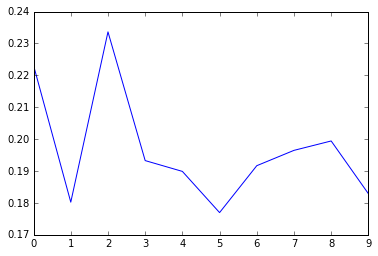

Erreur standard MGI


In [104]:
plt.plot(error_std_MGI, 'b')
plt.show()
print("Erreur standard MGI")

Avec la méthode WNN, encore une fois le MGD est rapidement interprété cepandant moins efficacement que précédemment et après 500 tests l'erreur moyenne arrive seulement à 5cm et l'erreur standard à 4cm. Cela rend cette méthode toutefois encore plus performante que la première.

En revanche, concernant le MGI, l'erreur moyenne varie entre 0,27 et 0,36m soit une beaucoup plus que les deux précédentes, tout comme la déviation standard.

Nous avons donc vu trois méthodes d'apprentissage. Elles ont toutes de bon résultats pour la découverte du modèle géométrique direct et lwlr-CMAES en a même d'excellents. En revanche, pour le MGI, tous les résultats sont décevants. Cela s'expliquerait certainement par le fait que pour le MGD à un jeu de positions articulaires des bras, il n'y a qu'une seule position possible. A l'inverse, pour le MGI, pour une position donnée, il peut y avoir plusieurs jeux de positions articulaires possibles et l'algorithme en serait perdus.